In [28]:
%pip install pandas

%pip install scipy

You should consider upgrading via the '/Users/jirayuwat/Desktop/2110203-COM-ENG-MATH-II/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/jirayuwat/Desktop/2110203-COM-ENG-MATH-II/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft

# 1. Identify price change rate of a stock

## download the stock data

In [4]:
!wget -nc 'https://drive.google.com/uc?id=1TtMtALjxQk44xv5VdH3ZBxBNzshuzclg' -O stocks_1y.csv

--2023-09-15 09:50:54--  https://drive.google.com/uc?id=1TtMtALjxQk44xv5VdH3ZBxBNzshuzclg
Resolving drive.google.com (drive.google.com)... 172.217.25.206
Connecting to drive.google.com (drive.google.com)|172.217.25.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/23gvpka06b18ous515kk7u0jvv0e4ngr/1694746200000/10800959494545164832/*/1TtMtALjxQk44xv5VdH3ZBxBNzshuzclg?uuid=65a2bc0d-25e1-44f8-ae8f-5cc1a7271802 [following]
--2023-09-15 09:50:54--  https://doc-0o-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/23gvpka06b18ous515kk7u0jvv0e4ngr/1694746200000/10800959494545164832/*/1TtMtALjxQk44xv5VdH3ZBxBNzshuzclg?uuid=65a2bc0d-25e1-44f8-ae8f-5cc1a7271802
Resolving doc-0o-2o-docs.googleusercontent.com (doc-0o-2o-docs.googleusercontent.com)... 172.217.26.65
Connecting to doc-0o-2o-docs.googleusercontent.com (doc-0o-2o-docs.googleuserconte

In [114]:
# YOUR INPUT PARAMETER - stock_no is based on the number 8th in your student ID
stock_no = 3

# Read and prepare the stock data, use this variable for 1.1-1.3
#       stock_data - 1-D numpy array of your assigned stock data
#       stock_name - the name of the stock
s = pd.read_csv("stocks_1y.csv")
stock_data = s.iloc[:,stock_no+1].to_numpy()
stock_name = s.columns.values[stock_no+1]
print("Total number of stock price in ONE year =",len(stock_data))


Total number of stock price in ONE year = 245


Dominant Frequency 1: 0.000000 Hz, Magnitude: 38251.531143, 0.000000
Dominant Frequency 2: 0.004082 Hz, Magnitude: 1525.980744, 1.000000
Dominant Frequency 3: -0.004082 Hz, Magnitude: 1525.980744, -1.000000
Dominant Frequency 4: -0.016327 Hz, Magnitude: 515.027595, -4.000000
Dominant Frequency 5: 0.016327 Hz, Magnitude: 515.027595, 4.000000
Dominant Frequency 6: -0.020408 Hz, Magnitude: 445.801998, -5.000000
Dominant Frequency 7: 0.020408 Hz, Magnitude: 445.801998, 5.000000


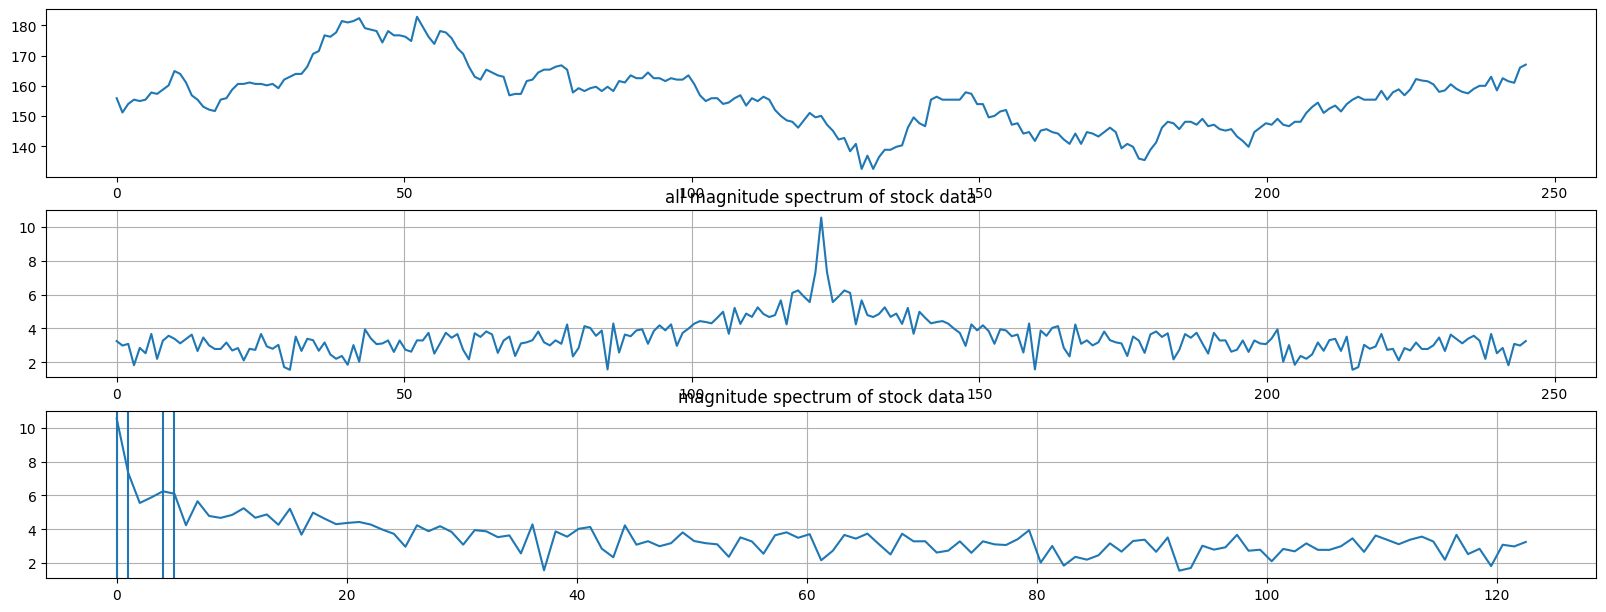

In [115]:
# TO DO - visualization and find top three dominant frequencies
X = np.linspace(0, stock_data.shape[0], stock_data.shape[0])
stock_data_fft = np.fft.fft(stock_data)
stock_data_fft_shifted = np.fft.fftshift(stock_data_fft)
stock_data_magnitude_spectrum = np.log(1 + np.abs(stock_data_fft_shifted))

plt.figure(figsize=(20, 10))
plt.subplot(4, 1, 1)
plt.plot(X, stock_data)
plt.subplot(4, 1, 2)
plt.title('all magnitude spectrum of stock data')
plt.grid()
plt.plot(X, stock_data_magnitude_spectrum)
plt.subplot(4, 1, 3)
plt.title('magnitude spectrum of stock data')
plt.grid()
plt.plot(X[:X.shape[0]//2+1], stock_data_magnitude_spectrum[X.shape[0]//2:])

# Compute the dominant frequencies (6 floating points)
# Compute the FFT
fft_result = fft(stock_data)

# Calculate the frequency values corresponding to the FFT result
freqs = np.fft.fftfreq(len(fft_result), 1/1)

# Find the dominant frequencies and their magnitudes
num_dominant_freqs = 7
top_indices = np.argsort(np.abs(fft_result))[::-1][:num_dominant_freqs]
dominant_freqs = freqs[top_indices]
dominant_magnitudes = np.abs(fft_result[top_indices])

# Print the top 3 dominant frequencies and their magnitudes
for i in range(num_dominant_freqs):
    print(f"Dominant Frequency {i+1}: {dominant_freqs[i]:.6f} Hz, Magnitude: {dominant_magnitudes[i]:.6f}, {(245.0*float(dominant_freqs[i])):.6f}")
    if dominant_freqs[i]//dominant_freqs[1] >=0:
        plt.axvline((dominant_freqs[i]//dominant_freqs[1]), 0, 10)



#2. Convolution in time domain vs. frequency domain
* Implement the convolution in time domain
* Implement the convolution using DFT
* Compare the computational time used for two methods

5.15 ms ± 51.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
112 µs ± 4.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Computational Time for Convolution in _____ Domain: 13.298569 seconds


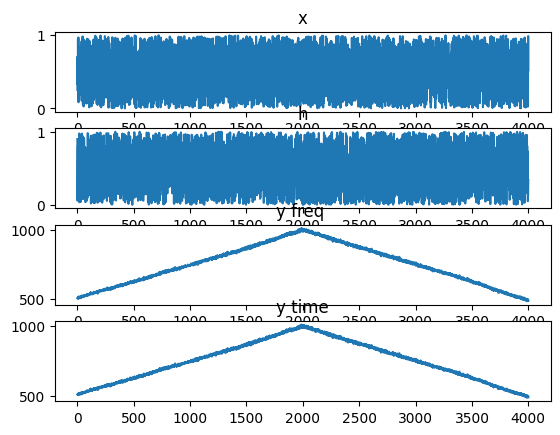

In [87]:
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.signal as signal

# Generate two random 4000-point sequences of x and h
N = 4000
x = np.random.rand(N)
h = np.random.rand(N)

# To calculate time elapsed for convolution process using start_time and end_time below
start_time = time.time()

# TO DO add convolution process in here
# convolution
%timeit np.convolve(x, h, mode='same')
y_time = np.convolve(x, h, mode='same')
# freq
%timeit signal.fftconvolve(x, h, mode='same')
y_mul = signal.fftconvolve(x, h, mode='same')
end_time = time.time()

plt.subplot(4, 1, 1)
plt.title('x')
plt.plot(np.linspace(0, N, N), x)
plt.subplot(4, 1, 2)
plt.title('h')
plt.plot(np.linspace(0, N, N), h)
plt.subplot(4, 1, 3)
plt.title('y freq ')
plt.plot(np.linspace(0, N, N), y_mul)
plt.subplot(4, 1, 4)
plt.title('y time')
plt.plot(np.linspace(0, N, N), y_time)


# Compute the convolution time (6 floating points)
convolution_time = end_time - start_time
print("Computational Time for Convolution in _____ Domain:", round(convolution_time,6), "seconds")



